# 1. Import libraries

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset again
data_path = "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Convert Churn to numeric (in case reloading)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(subset=["TotalCharges"], inplace=True)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


# 2. Churn Distribution

>>Check balance between churned vs. non-churned customers.

C:\Users\M.KAMRAN\AppData\Local\Temp\ipykernel_11496\3399571135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


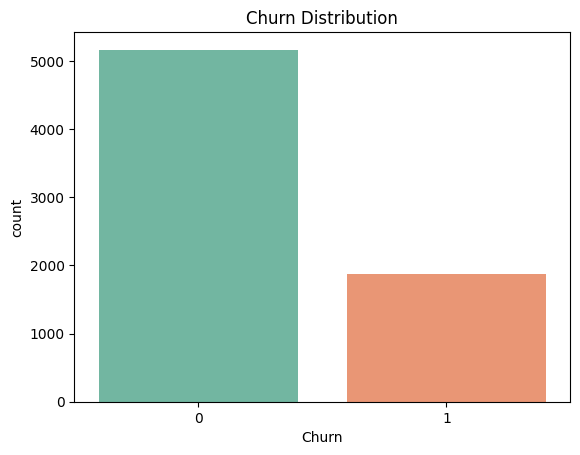

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [293]:
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.savefig("../results/plots/churn_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print(df["Churn"].value_counts(normalize=True))


# 3. Numerical Features vs Churn

>>Example: tenure, MonthlyCharges, TotalCharges

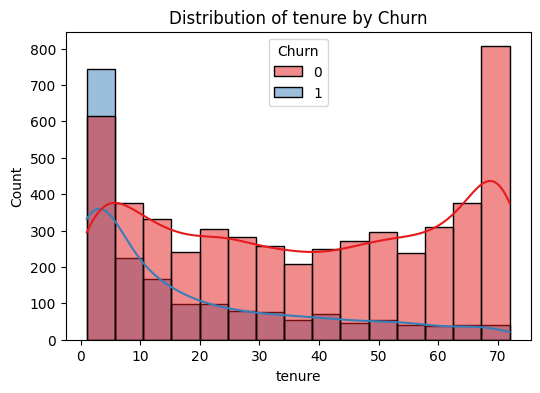

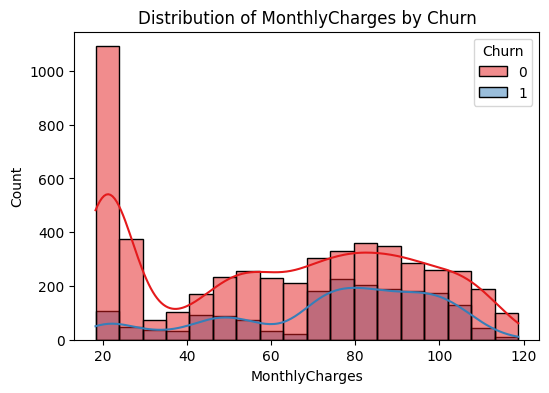

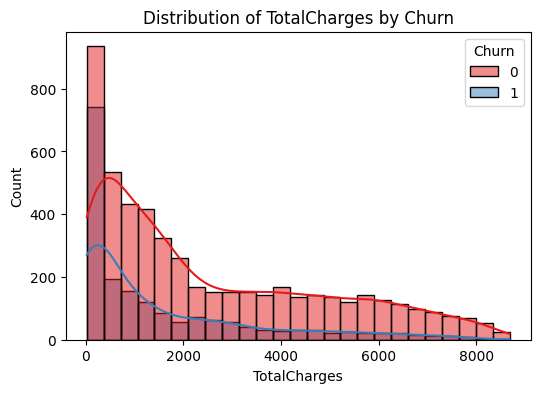

In [294]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, palette="Set1")
    plt.title(f"Distribution of {col} by Churn")
    plt.savefig("../results/plots/num_feature.png", dpi=300, bbox_inches="tight")
    plt.show()



# 4. Categorical Features vs Churn

>>Example: gender, Contract, InternetService, PaymentMethod.

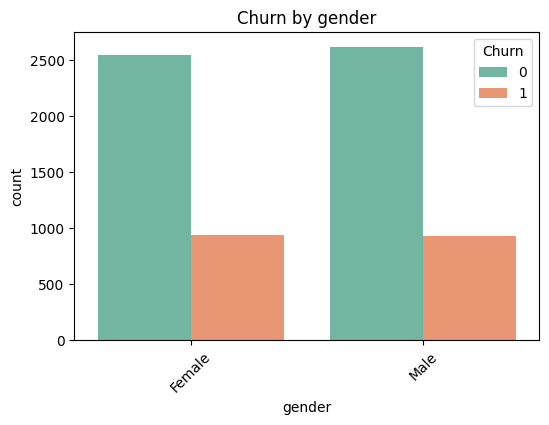

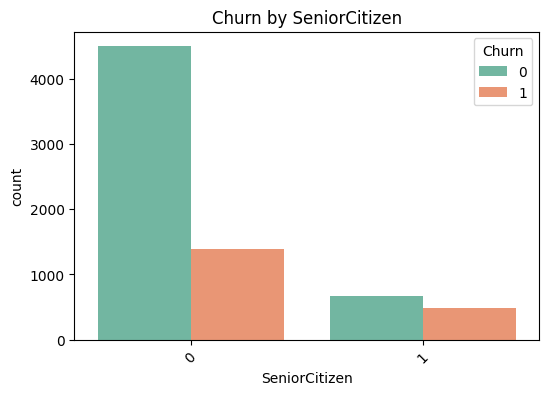

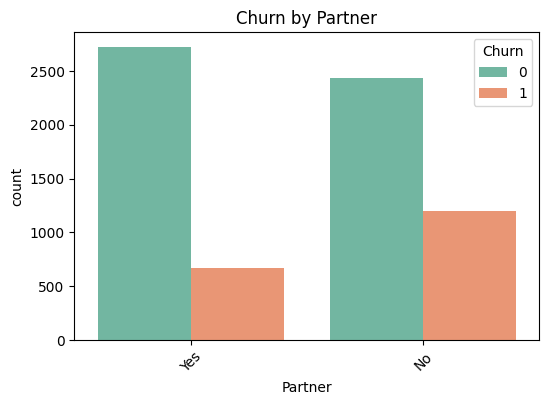

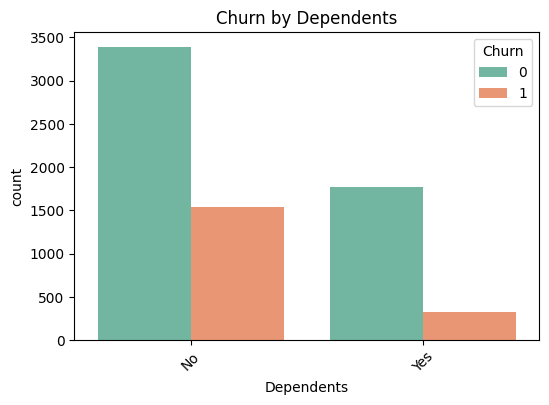

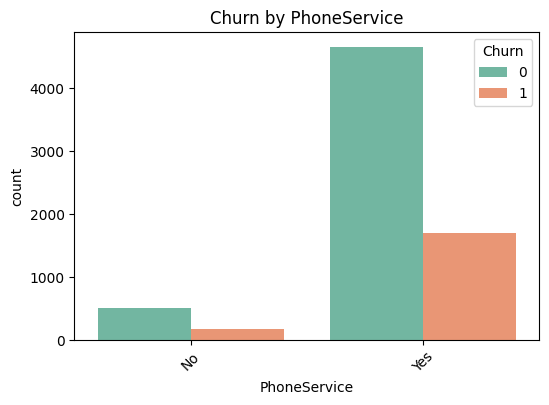

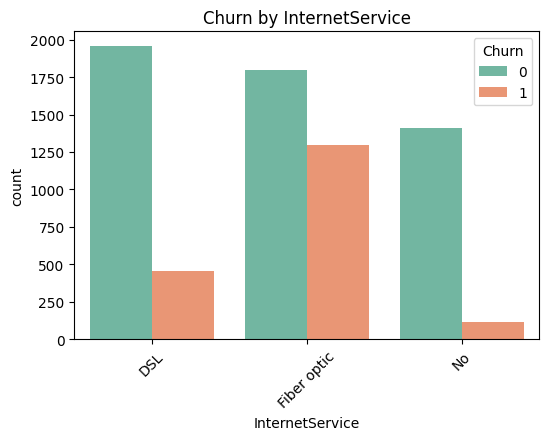

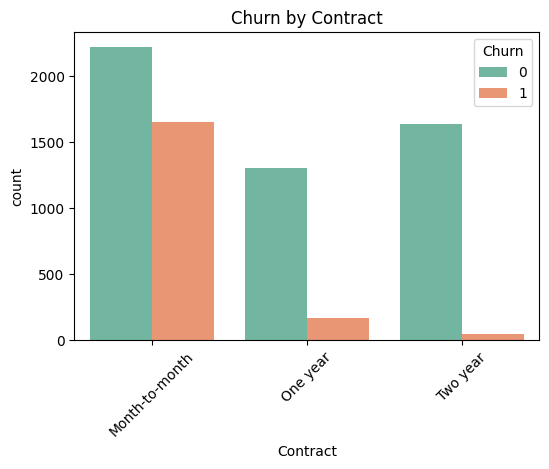

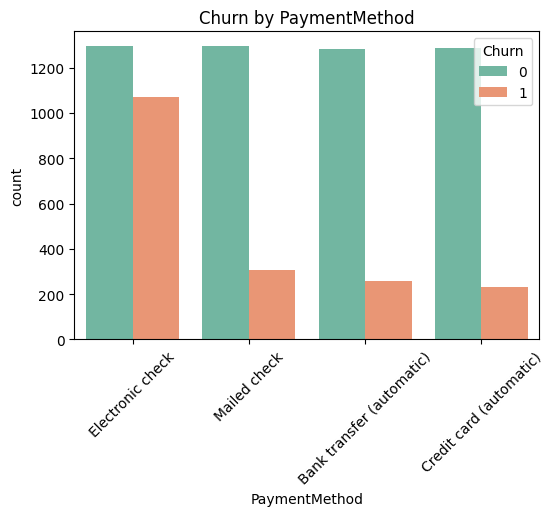

In [295]:
cat_features = ["gender", "SeniorCitizen", "Partner", "Dependents",
                "PhoneService", "InternetService", "Contract", "PaymentMethod"]

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2")
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.savefig("../results/plots/cat_features.png", dpi=300, bbox_inches="tight")
    plt.show()



# 5. Correlation Heatmap (for numerical features)

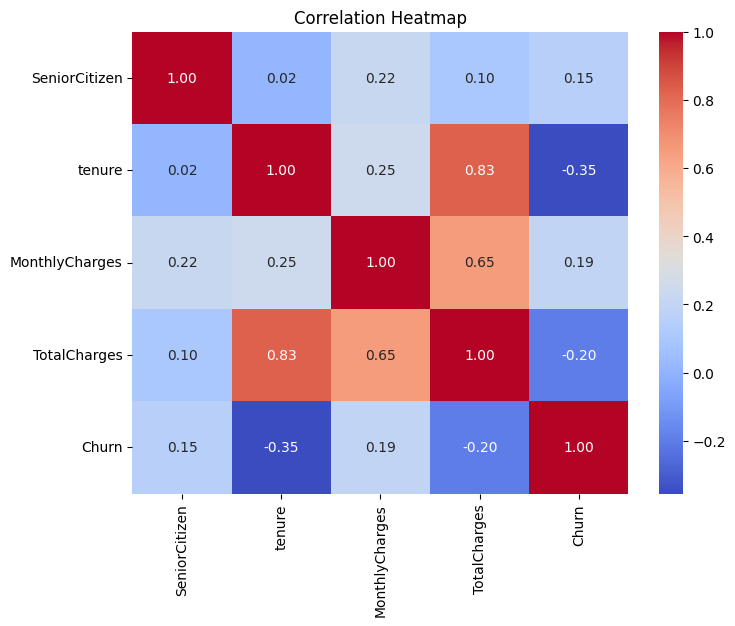

In [296]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("../results/plots/Correlation_Heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


# 6. Boxplots for Numeric Features vs Churn

C:\Users\M.KAMRAN\AppData\Local\Temp\ipykernel_11496\2890378639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")


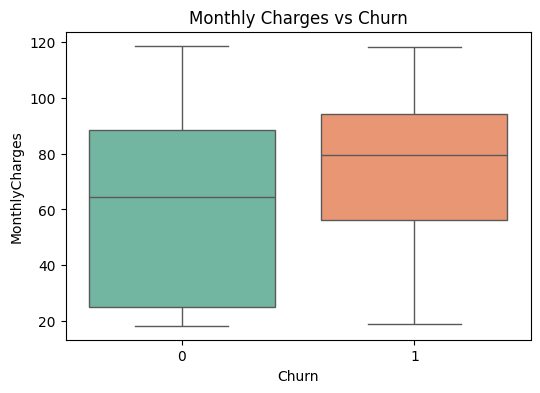

C:\Users\M.KAMRAN\AppData\Local\Temp\ipykernel_11496\2890378639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="TotalCharges", data=df, palette="Set2")


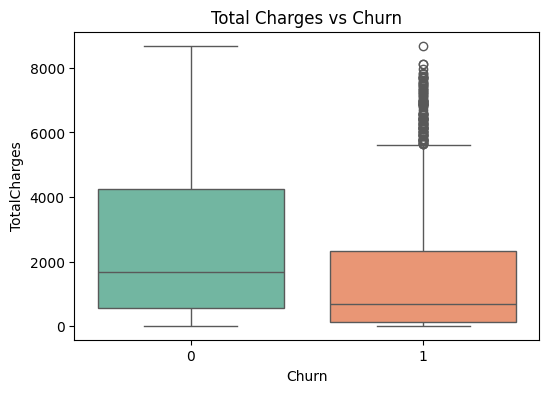

In [297]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Monthly Charges vs Churn")
plt.savefig("../results/plots/boxplot_monthlycharges.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="TotalCharges", data=df, palette="Set2")
plt.title("Total Charges vs Churn")
plt.savefig("../results/plots/boxplot_totalcharges.png", dpi=300, bbox_inches="tight")
plt.show()


# 7.Contract Type vs Churn (Key Business Insight)

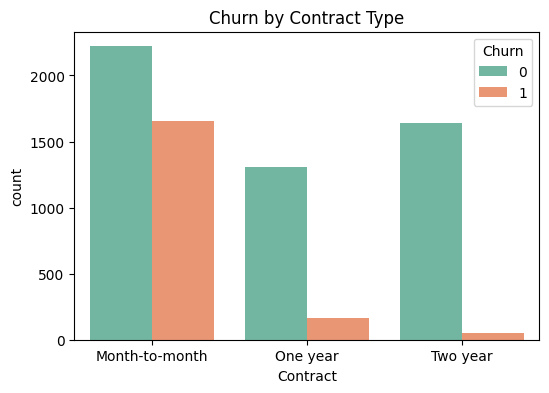

In [298]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Contract Type")
plt.savefig("../results/plots/churn_by_contract.png", dpi=300, bbox_inches="tight")
plt.show()


# 8.Internet Service vs Churn

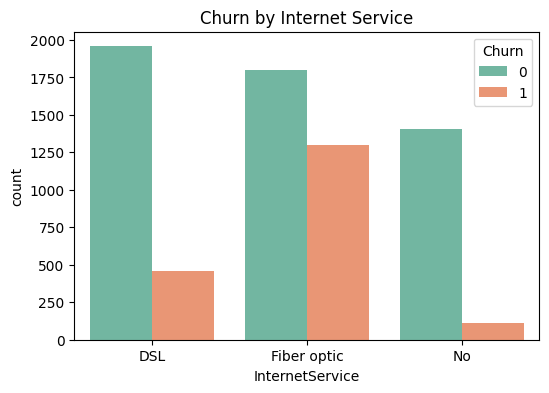

In [299]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Internet Service")
plt.savefig("../results/plots/churn_by_internetservice.png", dpi=300, bbox_inches="tight")
plt.show()


# 9. Payment Method vs Churn

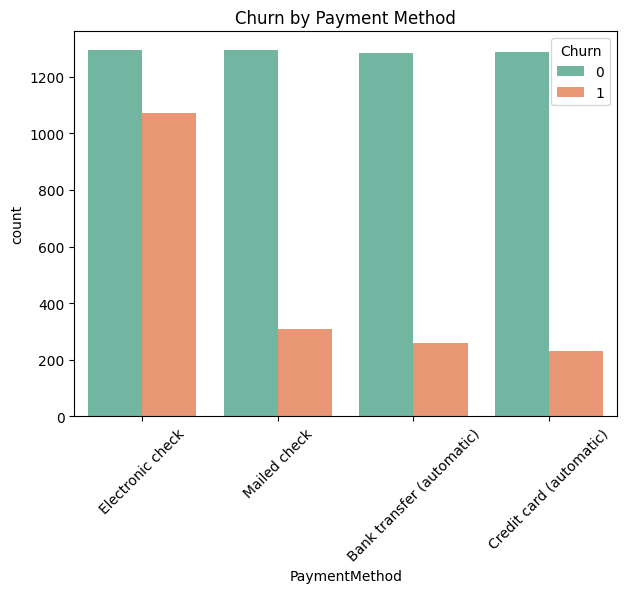

In [300]:
plt.figure(figsize=(7,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.savefig("../results/plots/churn_by_paymentmethod.png", dpi=300, bbox_inches="tight")
plt.show()


# Feature Engineering & Preprocessing

####  Drop customerID (not useful)

In [301]:

df = df.drop("customerID", axis=1)

### 1. Encode Categorical Variables

We’ll use Label Encoding for binary columns (e.g., Yes/No) and One-Hot Encoding for multi-category columns (e.g., Contract, PaymentMethod).

In [302]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df_encoded = df.copy()

# Convert bools to int
for col in df_encoded.select_dtypes(include=["bool"]).columns:
    df_encoded[col] = df_encoded[col].astype(int)

# One-hot encode the object columns
df_encoded = pd.get_dummies(df_encoded, columns=df_encoded.select_dtypes(include=["object"]).columns, drop_first=True)

print(df_encoded.dtypes)  # ✅ should now be only int64 / float64

df_encoded.head()


SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [303]:
# Convert bool columns to int
for col in df_encoded.select_dtypes(include=["bool"]).columns:
    df_encoded[col] = df_encoded[col].astype(int)

print(df_encoded.dtypes)  # should now show only int64 and float64


SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes     

### 2. FEATURES & TARGET

In [304]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

### 3.SPLIT DATA 

In [305]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


### 4.SCALE NUMERICAL COLUMNS 

In [306]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modeling

### 1.Logistic Regression

In [307]:


# ==== LOGISTIC REGRESSION ====
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ==== PREDICTIONS ====
y_pred = model.predict(X_test)

# ==== EVALUATION ====
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8038379530916845

📊 Confusion Matrix:
 [[916 117]
 [159 215]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



# Applying other models
>>[Random Forest+XGBoost+Gradient Boosting]

In [308]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=42, scale_pos_weight=3, use_label_encoder=False, eval_metric='logloss')
}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔹 {name}")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📈 Classification Report:\n", classification_report(y_test, y_pred))



🔹 Random Forest
✅ Accuracy: 0.7903340440653873
📊 Confusion Matrix:
 [[924 109]
 [186 188]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


🔹 Gradient Boosting
✅ Accuracy: 0.7931769722814499
📊 Confusion Matrix:
 [[917 116]
 [175 199]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



c:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost
✅ Accuracy: 0.7562189054726368
📊 Confusion Matrix:
 [[826 207]
 [136 238]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.53      0.64      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.70      1407
weighted avg       0.77      0.76      0.76      1407



# Hyperparameter Tuning by using grid search cv

In [309]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# ==== Hyperparameter grids ====

# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']  # l1 works with liblinear only
}

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1, 5]
}

# ==== Models ====
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), param_grid_lr),
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), param_grid_gb),
    "XGBoost": (XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42), param_grid_xgb)
}

# ==== Run GridSearchCV ====
best_models = {}
for model_name, (model, params) in models.items():
    print(f"\n🔍 Tuning {model_name} ...")
    grid = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    
    print(f"✅ Best Params for {model_name}: {grid.best_params_}")
    print(f"✅ Best Score: {grid.best_score_:.4f}")
    
    best_models[model_name] = grid.best_estimator_

# ==== Evaluate on Test Set ====
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, model in best_models.items():
    print(f"\n📊 Final Evaluation: {name}")
    y_pred = model.predict(X_test)
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📈 Classification Report:\n", classification_report(y_test, y_pred))



🔍 Tuning Logistic Regression ...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\M.K

✅ Best Params for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
✅ Best Score: 0.8034

🔍 Tuning Random Forest ...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
✅ Best Params for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
✅ Best Score: 0.8046

🔍 Tuning Gradient Boosting ...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
✅ Best Params for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
✅ Best Score: 0.8023

🔍 Tuning XGBoost ...
Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Params for XGBoost: {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
✅ Best Score: 0.8053

📊 Final Evaluation: Logistic Regression
✅ Accuracy: 0.7981520966595593
📊 Confusion Matrix:
 [[924 109]
 [175 199]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407


📊 Final Evaluation: Random Forest
✅ Accuracy: 0.7853589196872779
📊 Confusion Matrix:
 [[923 110]
 [192 182]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg    

# Since XGBoost performed the best (highest accuracy ≈ 0.81), we’ll now move to Step 7: Model Explainability using Feature Importance.

c:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Length of features: 30
Length of importances: 30

Top Features DataFrame Preview:
                               Feature  Importance
10         InternetService_Fiber optic    0.190745
25                   Contract_Two year    0.176560
12  OnlineSecurity_No internet service    0.174894
11                  InternetService_No    0.094723
24                   Contract_One year    0.064572


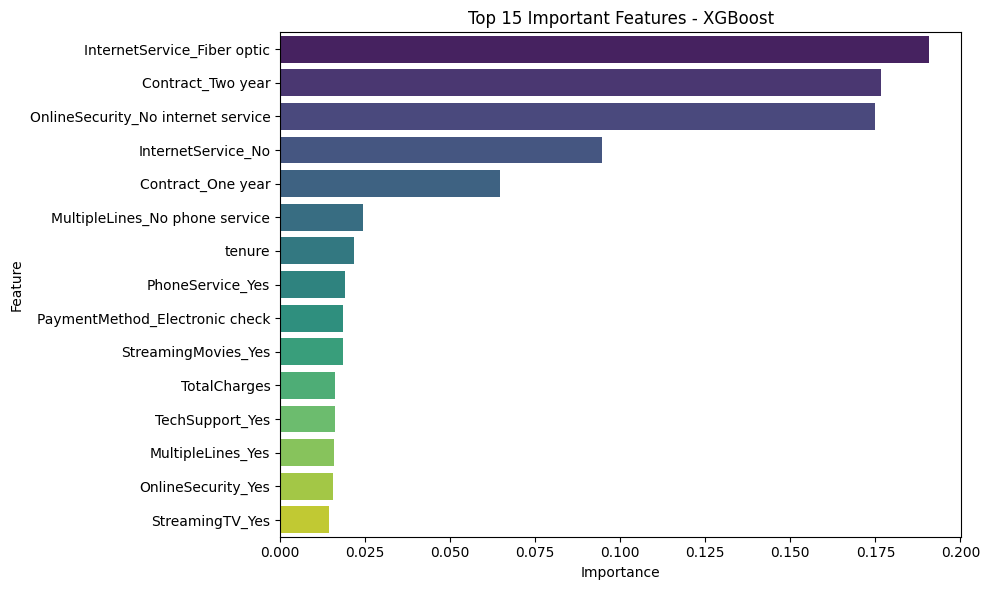


🔑 Top 10 Important Features in XGBoost:
                               Feature  Importance
10         InternetService_Fiber optic    0.190745
25                   Contract_Two year    0.176560
12  OnlineSecurity_No internet service    0.174894
11                  InternetService_No    0.094723
24                   Contract_One year    0.064572
8       MultipleLines_No phone service    0.024434
1                               tenure    0.021771
7                     PhoneService_Yes    0.019002
28      PaymentMethod_Electronic check    0.018560
23                 StreamingMovies_Yes    0.018447


In [310]:
# === Imports ===
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance

# === Train the best XGBoost model ===
# If you have grid_search already, keep **grid_search.best_params_**
# Otherwise, use manual params (safe defaults)

try:
    # If grid_search exists
    best_xgb = xgb.XGBClassifier(
        **grid_search.best_params_,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )
except NameError:
    # If grid_search not defined, use tuned-like defaults
    best_xgb = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )

best_xgb.fit(X_train, y_train)

# === Feature Importance Extraction ===
importances = best_xgb.feature_importances_
feature_names = X.columns

# Debugging checks
print("Length of features:", len(feature_names))
print("Length of importances:", len(importances))

# Create dataframe for visualization
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop Features DataFrame Preview:")
print(feat_imp.head())

# === Plot Top 15 Features ===
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_imp.head(15),
    palette="viridis",
    hue="Feature",
    dodge=False,
    legend=False
)
plt.title("Top 15 Important Features - XGBoost")
plt.tight_layout()

# ✅ Save plot before showing

plt.savefig("../results/plots/xgboost_feature_importance.png", dpi=300, bbox_inches="tight")


plt.show(block=True)


# === Print Top 10 Features in Console ===
print("\n🔑 Top 10 Important Features in XGBoost:")
print(feat_imp.head(10))


# cumulative importance

                               Feature  Importance  Cumulative
10         InternetService_Fiber optic    0.190745    0.190745
25                   Contract_Two year    0.176560    0.367306
12  OnlineSecurity_No internet service    0.174894    0.542199
11                  InternetService_No    0.094723    0.636923
24                   Contract_One year    0.064572    0.701494
8       MultipleLines_No phone service    0.024434    0.725928
1                               tenure    0.021771    0.747699
7                     PhoneService_Yes    0.019002    0.766701
28      PaymentMethod_Electronic check    0.018560    0.785261
23                 StreamingMovies_Yes    0.018447    0.803708
3                         TotalCharges    0.016164    0.819872
19                     TechSupport_Yes    0.016042    0.835914
9                    MultipleLines_Yes    0.015775    0.851689
13                  OnlineSecurity_Yes    0.015443    0.867132
21                     StreamingTV_Yes    0.014534    0

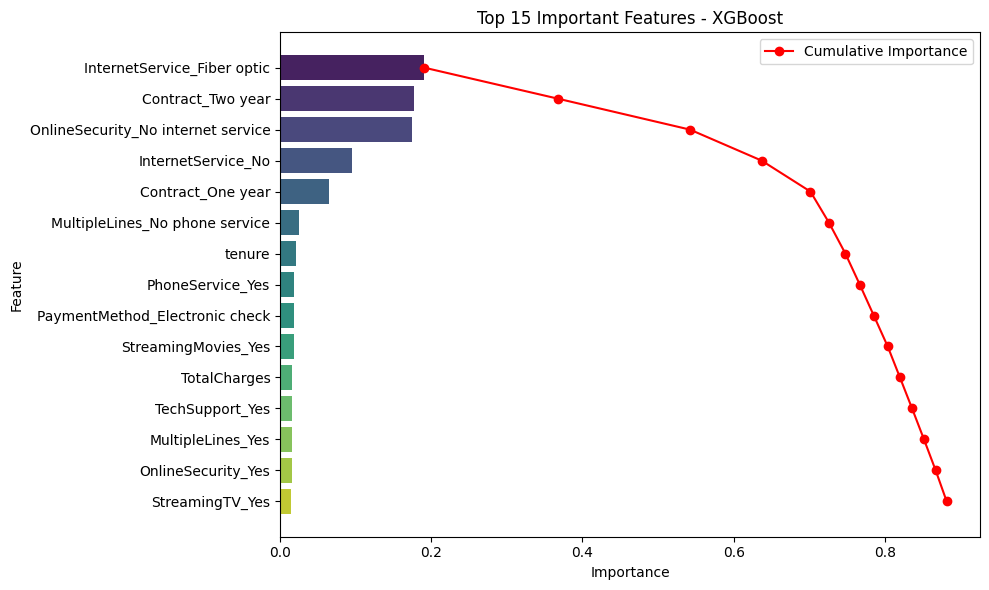

In [311]:
# ✅ Add cumulative importance
feat_imp["Cumulative"] = feat_imp["Importance"].cumsum()

# Show top 15 with cumulative
print(feat_imp.head(15))

# --- Plot with cumulative line ---
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_imp.head(15),
    palette="viridis",
    hue="Feature",
    dodge=False,
    legend=False
)

# Add cumulative importance line
cum_vals = feat_imp.head(15)["Cumulative"].values
plt.plot(cum_vals, feat_imp.head(15)["Feature"], marker="o", color="red", label="Cumulative Importance")

plt.title("Top 15 Important Features - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()

# Save plot
plt.savefig("../results/plots/xgboost_feature_importance_with_cumulative.png", dpi=300, bbox_inches="tight")
plt.show(block=True)


                               Feature  Importance  Cumulative  \
0          InternetService_Fiber optic    0.190745    0.190745   
1                    Contract_Two year    0.176560    0.367306   
2   OnlineSecurity_No internet service    0.174894    0.542199   
3                   InternetService_No    0.094723    0.636923   
4                    Contract_One year    0.064572    0.701494   
5       MultipleLines_No phone service    0.024434    0.725928   
6                               tenure    0.021771    0.747699   
7                     PhoneService_Yes    0.019002    0.766701   
8       PaymentMethod_Electronic check    0.018560    0.785261   
9                  StreamingMovies_Yes    0.018447    0.803708   
10                        TotalCharges    0.016164    0.819872   
11                     TechSupport_Yes    0.016042    0.835914   
12                   MultipleLines_Yes    0.015775    0.851689   
13                  OnlineSecurity_Yes    0.015443    0.867132   
14        

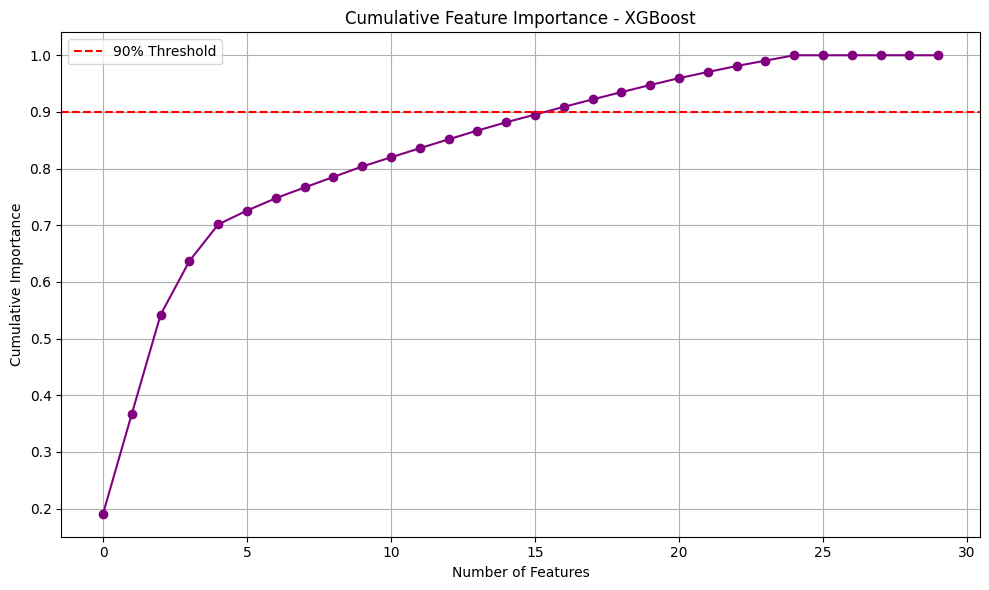

In [312]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Make sure the directory exists
os.makedirs("../results/plots", exist_ok=True)

# Sort features by importance
feat_imp_sorted = feat_imp.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Calculate cumulative importance
feat_imp_sorted["Cumulative Importance"] = feat_imp_sorted["Importance"].cumsum()

# Show top rows
print(feat_imp_sorted.head(20))

# Plot cumulative importance
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(feat_imp_sorted)), feat_imp_sorted["Cumulative Importance"], marker="o", color="purple")
plt.axhline(y=0.9, color="red", linestyle="--", label="90% Threshold")  # add threshold line
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save to ../results/plots/
plt.savefig("../results/plots/cumulative_importance.png", dpi=300, bbox_inches="tight")
plt.show()
